In [ ]:
import numpy as np
from sklearn.metrics import recall_score, confusion_matrix, classification_report

# Binary classification
Y_true = np.array([0, 0, 0, 1, 1, 0, 1, 1])
Y_pred = np.array([1, 0, 0, 1, 1, 0, 1, 1])

# Sklearn recall
print(f"Sklearn Recall: {recall_score(Y_true, Y_pred):.4f}")

# Manual recall function
def calculate_recall(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return tp / (tp + fn)

manual_recall = calculate_recall(Y_true, Y_pred)
print(f"Manual Recall: {manual_recall:.4f}")

# Multiclass classification
Y_true_multi = np.array([0, 1, 2, 0, 1, 2])
Y_pred_multi = np.array([0, 2, 1, 0, 0, 1])

# Per-class recall
for class_idx in range(3):
    class_recall = recall_score(Y_true_multi, Y_pred_multi, average=None)[class_idx]
    print(f"Class {class_idx} Recall: {class_recall:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(Y_true, Y_pred, target_names=['Negative', 'Positive']))

Sklearn Recall: 1.0000
Manual Recall: 1.0000
Class 0 Recall: 1.0000
Class 1 Recall: 0.0000
Class 2 Recall: 0.0000

Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.75      0.86         4
    Positive       0.80      1.00      0.89         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



Confusion matrix, without normalization
[[3 1]
 [0 4]]


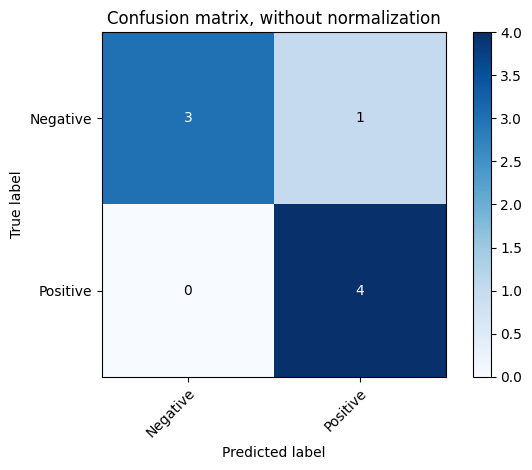

In [ ]:
# prompt: make graph of the code

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming Y_true and Y_pred are defined as in the previous code
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_true, Y_pred, classes=['Negative', 'Positive'],
                      title='Confusion matrix, without normalization')

plt.show()
